# Best-Practices Handbook: Addressing Multicollinearity in Regression Modeling

## 1. Definition
**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated, leading to unreliable estimates of the coefficients. Mathematically, if $X_1, X_2, \ldots, X_k$ are the independent variables, multicollinearity is present if:

$$
\text{Corr}(X_i, X_j) \approx 1 \quad \text{or} \quad \text{Corr}(X_i, X_j) \approx -1 \quad \text{for } i \neq j
$$

This results in inflated standard errors for the coefficients, making hypothesis tests unreliable.

## 2. Description
Multicollinearity complicates the interpretation of regression coefficients, as it becomes difficult to determine the individual effect of each predictor on the dependent variable. It can lead to unstable estimates and reduced statistical power.

## 3. Demonstration
### Numerical Example
Consider a simulated dataset with three independent variables $X_1$, $X_2$, and $X_3$:

```python
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating data
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
X3 = np.random.normal(0, 1, 100)
Y = 3 + 2 * X1 + np.random.normal(0, 1, 100)

data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3})

# Fitting a regression model
X = sm.add_constant(data[['X1', 'X2', 'X3']])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())
```

### Visual Example
```python
# Visualizing the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
```

### Output Interpretation
The regression summary will likely show high standard errors for $X_1$ and $X_2$ due to their multicollinearity, and the correlation matrix will indicate a strong correlation between $X_1$ and $X_2$

## 4. Diagnosis
To identify multicollinearity, you can use:

- **Variance Inflation Factor (VIF)**: A VIF value greater than `5` is often taken as an indication of *_severe_* multicollinearity. While a VIF value between `1` and `5` indicates no severe multicollinearity issue
  
$$
VIF_i = \frac{1}{1 - R^2_i}
$$

Where $R^2_i$ is the R-squared value obtained by regressing the $i$-th independent variable against all other independent variables.

### Example Code for VIF
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
```

## 5. Discussion
### Consequences
The presence of multicollinearity can:
- Lead to large standard errors, making hypothesis tests unreliable.
- Cause coefficients to change dramatically with small changes in the model or data.

### Techniques to Address Multicollinearity
1. **Remove Variables**: Consider removing one of the correlated variables.
2. **Combine Variables**: Create composite indices or use principal component analysis (PCA) to reduce dimensionality.
3. **Regularization Techniques**: Use Lasso or Ridge regression, which can handle multicollinearity by adding a penalty term to the loss function.

### Practical Recommendations
- Always check for multicollinearity using VIF before finalizing your regression model.
- If multicollinearity is detected, consider the context of the variables and choose the most relevant ones for your analysis.

## References
- Kutner, M. H., Nachtsheim, C. J., Neter, J., & Li, W. (2004). *Applied Linear Statistical Models*. McGraw-Hill.
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*. Springer.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating data
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
X3 = np.random.normal(0, 1, 100)
Y = 3 + 2 * X1 + np.random.normal(0, 1, 100)

data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3})

# Fitting a regression model
X = sm.add_constant(data[['X1', 'X2', 'X3']])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     147.1
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           9.06e-36
Time:                        13:28:25   Log-Likelihood:                -133.20
No. Observations:                 100   AIC:                             274.4
Df Residuals:                      96   BIC:                             284.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8091      0.094     29.818      0.0

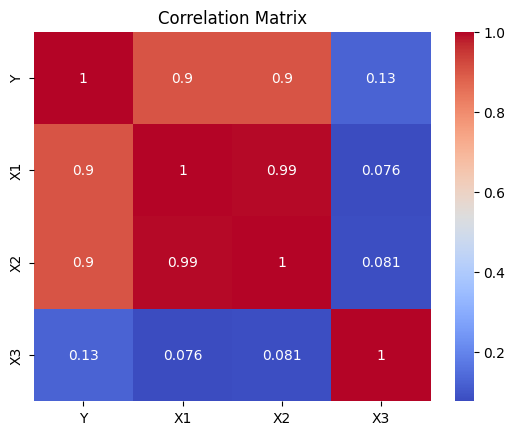

In [2]:
# Visualizing the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature        VIF
0   const   1.013836
1      X1  99.465752
2      X2  99.534999
3      X3   1.008147
